# Practical 3: Implement Statistical Distribution
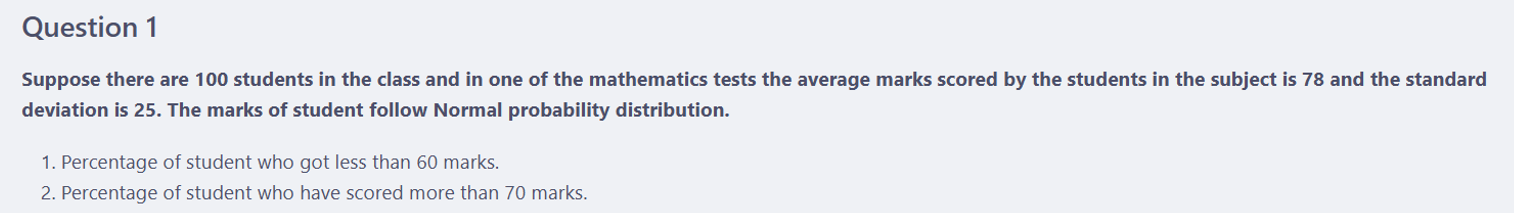


In [1]:
from scipy.stats import norm
from scipy import stats

In [2]:
U = 78
sd = 25
N = 100

score = 60
# find percentage of students who got less than 60 marks.

z_score = (score-U)/sd
print(z_score)

prob = norm.cdf(z_score)
print(prob)

-0.72
0.23576249777925118


so 23 percent students got less marks than 60.

In [3]:
## percentage of students who have scored mote than 70 marks.

In [4]:
score = 70

z_score = (score-U)/sd
print(z_score)

prob = norm.cdf(z_score)
print(1-prob)

-0.32
0.6255158347233201


so 62 percent students got more than 70 marks.

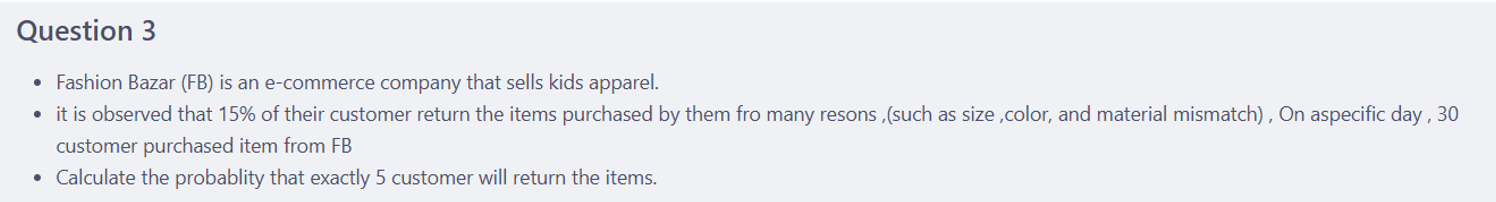

In [5]:
from scipy.stats import binom
import matplotlib.pyplot as plt

In [7]:
n = 30
r = 5
p = 0.15
binom.pmf(r,n , p)


0.18610694845752918

so there is 18% chance that exactly 5 customers will return the items.

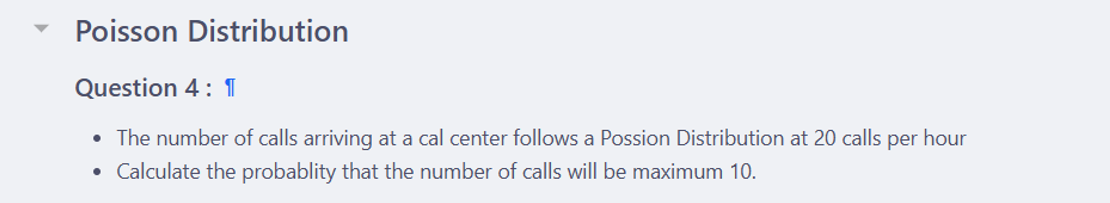

In [8]:
from scipy.stats import poisson

poisson.cdf(10, 20)

0.010811718826652723

the probability that calls will be maximum 10 is 0.0108.

## CHi square Distribution.

In [10]:
import numpy as np
from scipy.stats import chi2

degree_of_freedom = 5

x = np.linspace(0, 20 , 10000)

In [12]:
pdf = chi2.pdf(x, degree_of_freedom)
pdf

array([0.00000000e+00, 1.18840539e-05, 3.35795808e-05, ...,
       5.40912910e-04, 5.40453296e-04, 5.39994064e-04])

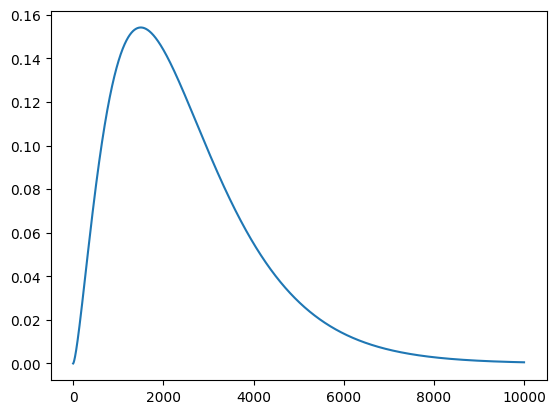

In [13]:
plt.plot(pdf);

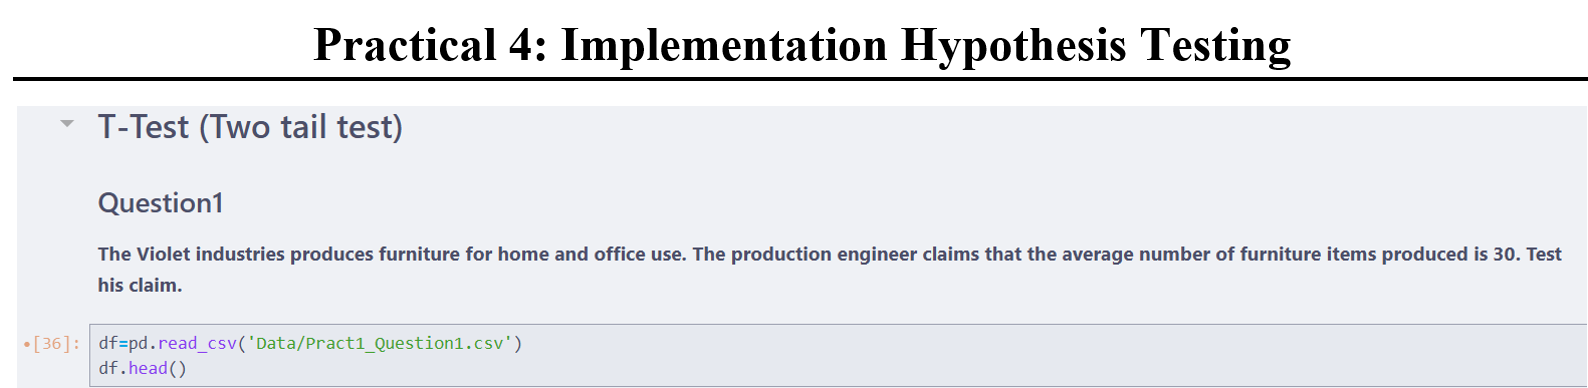

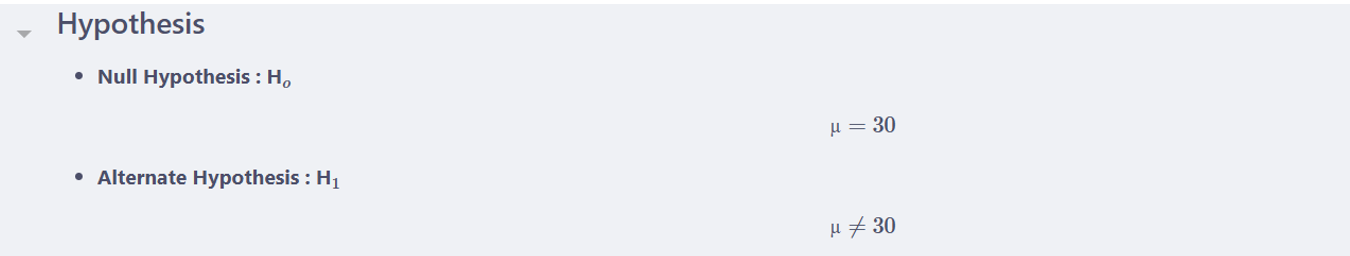

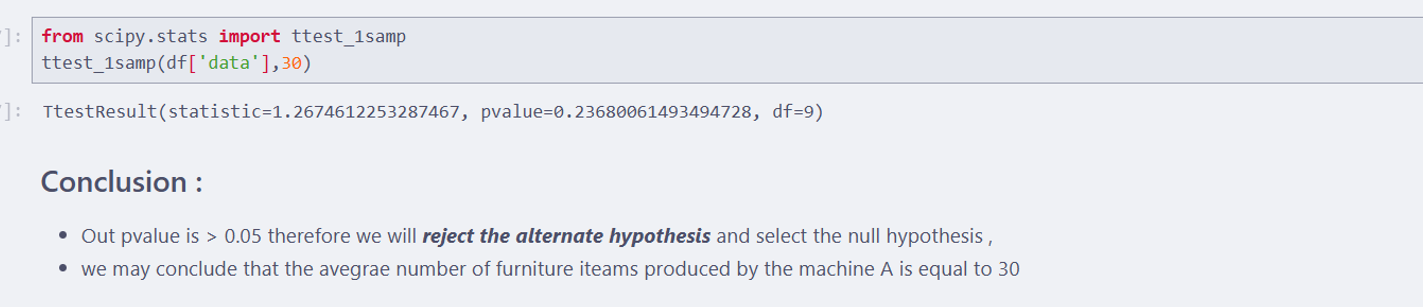

In [ ]:
from scipy.stats import ttest_1samp

ttest_1samp(df['data'], 30)

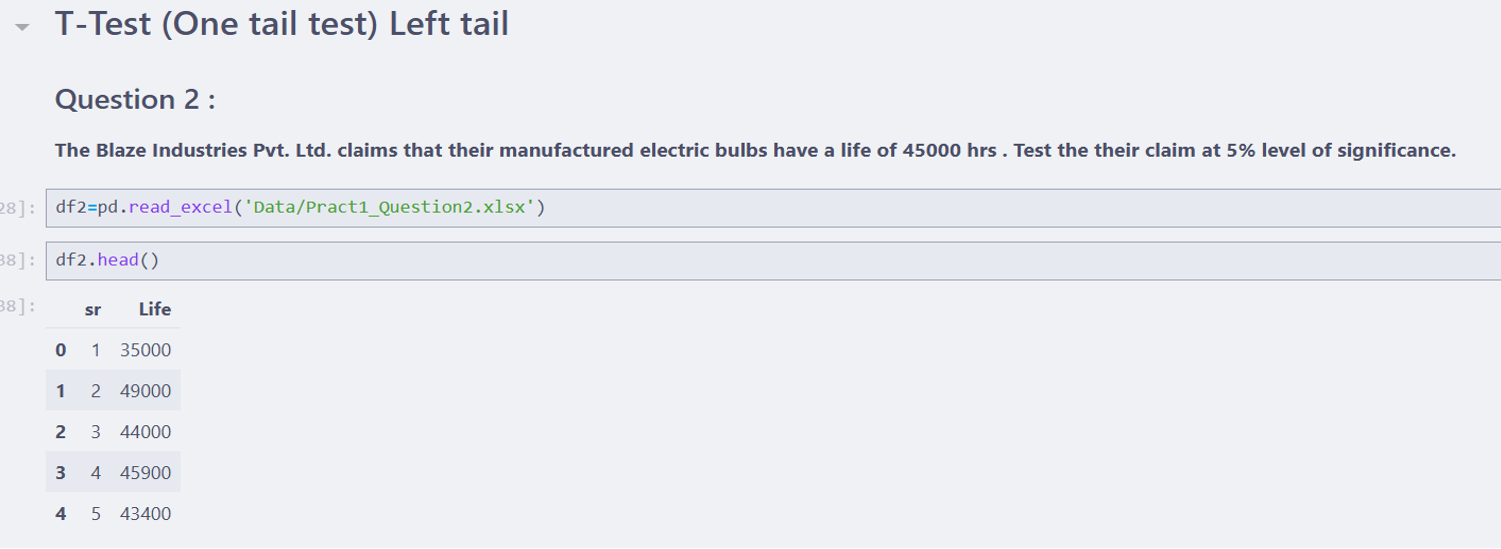

---

# Perform One and Two way Anova on the given dataset

In [16]:
import numpy as np 

method1 = np.array([85, 88, 92, 94, 90])
method2 = np.array([78, 80, 83, 77, 79])
method3 = np.array([85, 89, 94, 96, 92])

f_stat, p_value = stats.f_oneway(method1, method2, method3)
print("f_stat::", f_stat)
print("P_value::", p_value)

f_stat:: 17.220994475138106
P_value:: 0.0002975929314702732


p value is less than 0.05 (p< 0.05) that means there is a significant difference betweent the 3 methods.

In [17]:
import pandas as pd

data = pd.DataFrame({
    'Score' : [85, 78, 91, 88, 80, 89, 92, 83, 94, 94, 77, 96, 90, 79, 92],
    'Method' : ['Method1', 'Method1', 'Method1', 'Method2', 'Method2', 'Method2', 'Method3', 'Method3', 'Method1', 'Method1', 
                'Method2', 'Method2', 'Method3', 'Method3', 'Method3'],
    'Gender': ['Female', 'Female', 'Female', 'Male', 'Male', 'Male', 'Female', 'Female', 'Male', 'Female', 
               'Female', 'Female', 'Male', 'Female', 'Female']
})


In [18]:
data

,Score,Method,Gender
0,85,Method1,Female
1,78,Method1,Female
2,91,Method1,Female
3,88,Method2,Male
4,80,Method2,Male
5,89,Method2,Male
6,92,Method3,Female
7,83,Method3,Female
8,94,Method1,Male
9,94,Method1,Female


In [19]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols("Score ~ C(Method)*C(Gender)", data= data).fit()

anova_table = sm.stats.anova_lm(model, type = 2)
print(anova_table)

                      df      sum_sq    mean_sq         F    PR(>F)
C(Method)            2.0   14.400000   7.200000  0.127517  0.881841
C(Gender)            1.0   19.557143  19.557143  0.346371  0.570647
C(Method):C(Gender)  2.0   30.276190  15.138095  0.268107  0.770725
Residual             9.0  508.166667  56.462963       NaN       NaN
